## Figure: OOD Generalization

## Set up

In [6]:
# autoreload
%load_ext autoreload
%autoreload 2
# jupyter black formatter
%load_ext jupyter_black

import subprocess
import os
import sys

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "pirnns"))
print("Working directory: ", os.getcwd())

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
Working directory:  /home/facosta/pirnns/pirnns
Directory added to path:  /home/facosta/pirnns
Directory added to path:  /home/facosta/pirnns/pirnns


## Load all the trained models

In [7]:
from pirnns.paper_figs.load_models import load_experiment_sweep
import torch


sweep_dir = (
    "/home/facosta/pirnns/pirnns/logs/experiments/timescales_sweep_20250919_130449"
)

device = "cuda" if torch.cuda.is_available() else "cpu"

models, metadata, summary = load_experiment_sweep(
    sweep_dir=sweep_dir,
    device=device,
    use_lightning_checkpoint=True,
    checkpoint_type="best",
)

print("\nLoaded experiments:")
for exp_name, seeds in models.items():
    print(f"  {exp_name}: {len(seeds)} seeds")

    # Show timescales config for this experiment
    sample_config = list(seeds.values())[0]["config"]
    timescales_config = sample_config["timescales_config"]
    print(f"    Timescales config: {timescales_config}")

    # Show validation loss stats
    val_losses = [seed_data["final_val_loss"] for seed_data in seeds.values()]
    print(f"    Val loss range: {min(val_losses):.4f} - {max(val_losses):.4f}")

    # Show training data availability
    training_data_count = sum(
        1 for seed_data in seeds.values() if seed_data["training_losses"]
    )
    print(f"    Training curves available: {training_data_count}/{len(seeds)} seeds")
    print()

Loading 8 experiments with 5 seeds each...
Total models to load: 40
Using Lightning checkpoints

Loading experiment: discrete_single_025
  ✓ Loaded discrete_single_025/seed_0
  ✓ Loaded discrete_single_025/seed_1
  ✓ Loaded discrete_single_025/seed_2
  ✓ Loaded discrete_single_025/seed_3
  ✓ Loaded discrete_single_025/seed_4
Loading experiment: discrete_single_05
  ✓ Loaded discrete_single_05/seed_0
  ✓ Loaded discrete_single_05/seed_1
  ✓ Loaded discrete_single_05/seed_2
  ✓ Loaded discrete_single_05/seed_3
  ✓ Loaded discrete_single_05/seed_4
Loading experiment: discrete_single_075
  ✓ Loaded discrete_single_075/seed_0
  ✓ Loaded discrete_single_075/seed_1
  ✓ Loaded discrete_single_075/seed_2
  ✓ Loaded discrete_single_075/seed_3
  ✓ Loaded discrete_single_075/seed_4
Loading experiment: discrete_single_1
  ✓ Loaded discrete_single_1/seed_0
  ✓ Loaded discrete_single_1/seed_1
  ✓ Loaded discrete_single_1/seed_2
  ✓ Loaded discrete_single_1/seed_3
  ✓ Loaded discrete_single_1/seed_4
L

## OOD generalization (trajectory lengths)

Evaluating OOD generalization for loaded models...
Evaluating OOD generalization for 8 experiments
Test lengths: [25, 30, 35, 40, 50, 60, 80, 100]
Device: cuda

Processing experiment: discrete_single_025
  Training length: 20
  Testing 5 seeds on lengths: [25, 30, 35, 40, 50, 60, 80, 100]
    Processing seed 0...
      Testing length 25...
        Error: 0.9784
      Testing length 30...
        Error: 0.9411
      Testing length 35...
        Error: 0.9456
      Testing length 40...
        Error: 0.9216
      Testing length 50...
        Error: 0.9502
      Testing length 60...
        Error: 0.9367
      Testing length 80...
        Error: 0.9438
      Testing length 100...
        Error: 0.9390
    Processing seed 1...
      Testing length 25...
        Error: 0.9564
      Testing length 30...
        Error: 0.9630
      Testing length 35...
        Error: 0.9286
      Testing length 40...
        Error: 0.9463
      Testing length 50...
        Error: 0.9348
      Testing length 6

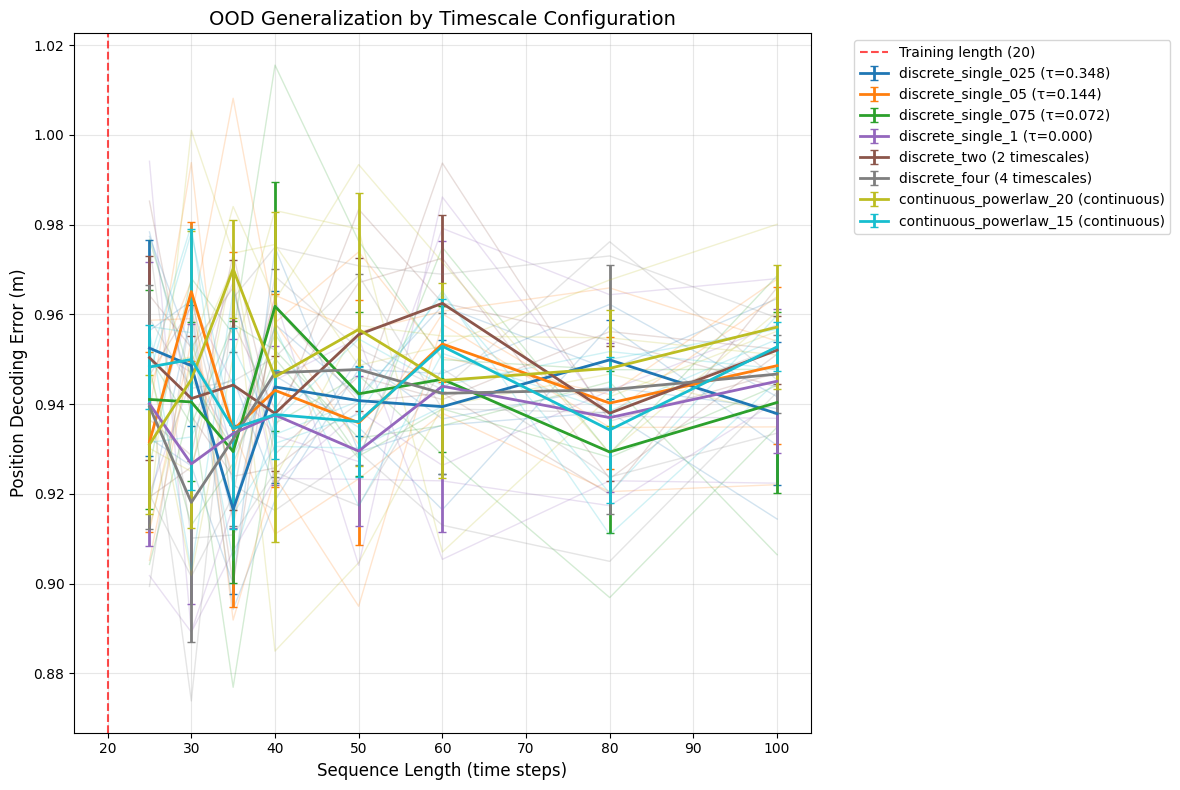

In [ ]:
from pirnns.paper_figs.ood_generalization.ood_trajectories import analyze_sweep_ood

# Simple OOD analysis using loaded models
test_lengths = [10, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 35, 40, 50]
results = analyze_sweep_ood(
    models,
    test_lengths,
    paper_ready=False,
    num_test_trajectories=100,
    device="cuda",
    save_path=None,
)

# # Or for paper figure
# results = analyze_sweep_ood(models, test_lengths, save_path="ood_paper.pdf", paper_ready=True)